# Workshop No 1: Python Data Engineer
María de los Ángeles Amú Moreno


During these workshop, we will address the specified requirements and present diagrams and visualizations to elucidate the solutions. Our approach involves employing SQLAlchemy as an Object-Relational Mapping (ORM) tool connected to MariaDB, and we will generate visual representations using pyplot from the Matplotlib library.

### The step #1 is to import the modules and to explore the dataset.



In [65]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\USER\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [71]:
from sqlalchemy import Column, Integer, String, Boolean, Date, CHAR
from sqlalchemy.orm import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
import json
import pandas as pd

In [91]:
import pandas as pd
data= pd.read_csv('candidates.csv', sep=';')

In [92]:
data.shape

(50000, 10)

There are 50000 rows and 10 columns in this dataset, with the information of candidates.

In [93]:
data.head()

,First Name,Last Name,Email,Application Date,Country,YOE,Seniority,Technology,Code Challenge Score,Technical Interview Score
0,Bernadette,Langworth,leonard91@yahoo.com,2021-02-26,Norway,2,Intern,Data Engineer,3,3
1,Camryn,Reynolds,zelda56@hotmail.com,2021-09-09,Panama,10,Intern,Data Engineer,2,10
2,Larue,Spinka,okey_schultz41@gmail.com,2020-04-14,Belarus,4,Mid-Level,Client Success,10,9
3,Arch,Spinka,elvera_kulas@yahoo.com,2020-10-01,Eritrea,25,Trainee,QA Manual,7,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,2020-05-20,Myanmar,13,Mid-Level,Social Media Community Management,9,7


We can take a small peek of the dataset here:

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   First Name                 50000 non-null  object
 1   Last Name                  50000 non-null  object
 2   Email                      50000 non-null  object
 3   Application Date           50000 non-null  object
 4   Country                    50000 non-null  object
 5   YOE                        50000 non-null  int64 
 6   Seniority                  50000 non-null  object
 7   Technology                 50000 non-null  object
 8   Code Challenge Score       50000 non-null  int64 
 9   Technical Interview Score  50000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 3.8+ MB


This informs us that there are no null values in the data, and we are dealing with a combination of objects and integers.

In [95]:
num_cols = data.select_dtypes(include=['int64'])
num_desc = num_cols.describe().round(3)
num_desc

,YOE,Code Challenge Score,Technical Interview Score
count,50000.000,50000.000,50000.000
mean,15.287,4.996,5.004
std,8.831,3.167,3.165
min,0.000,0.000,0.000
25%,8.000,2.000,2.000
50%,15.000,5.000,5.000
75%,23.000,8.000,8.000
max,30.000,10.000,10.000


In this context, we observe, for example, that the average years of experience is around 15 years. The candidate with the highest experience has devoted 30 years to their work, and approximately 23% of candidates have less than 8 years of experience, while 75% have less than 23 years of experience.

In [96]:
num_cols = data.select_dtypes(include=['object'])
num_desc = num_cols.describe()
num_desc

,First Name,Last Name,Email,Application Date,Country,Seniority,Technology
count,50000,50000,50000,50000,50000,50000,50000
unique,3007,474,49833,1646,244,7,24
top,Sarai,Murazik,fern70@gmail.com,2020-07-07,Malawi,Intern,Game Development
freq,33,138,3,50,242,7255,3818


In this context, the key information is that there are a total of 7 distinct seniority levels and 24 different technologies. Notably, "Intern" and "Game Development" are the most frequently occurring in their respective categories.

In [98]:
min_date= data['Application Date'].min()

max_date= data['Application Date'].max()

print("The data goes from: "+ str(min_date)+ " to " + str(max_date))

The data goes from: 2018-01-01 to 2022-07-04


This data goes from the beginning of 2018 to july of 2022.

### Step # 2: Establishing the connection to the database and creating the table with the columns.

In this step, I created the database credentials called "credentials.json", and contains the username, password, port, server & database name.

In [73]:
with open('credentials.json', 'r') as json_file:
    data = json.load(json_file)
    user = data["user"]
    password = data["password"]
    port= data["port"]
    server = data["server"]
    db = data["db"]

db_connection = f"mysql+mysqlconnector://{user}:{password}@{server}:{port}/{db}"
engine=create_engine(db_connection)
print(f"conectado a {db_connection}")


conectado a mysql+mysqlconnector://root:@localhost:3306/candidate_db


This message confirms that the connection to the database was made correctly. To later create the table with the required columns

In [69]:
Base= declarative_base()

class Candidate(Base):
    __tablename__ = 'candidates'
    id = Column(Integer, primary_key=True, autoincrement=True)
    first_name = Column(String(50))
    last_name = Column(String(50))
    email = Column(String(100))
    application_date = Column(Date)
    country = Column(String(200))
    yoe = Column(Integer)
    seniority = Column(String(200))
    technology = Column(String(200))
    code_challenge_score = Column(Integer)
    technical_interview_score = Column(Integer)

engine = create_engine(db_connection)
Base.metadata.create_all(engine)

In [ ]:
Base= declarative_base()

class Candidate(Base):
    __tablename__ = 'hireCandidates'
    id = Column(Integer, primary_key=True, autoincrement=True)
    first_name = Column(String(50))
    last_name = Column(String(50))
    email = Column(String(100))
    application_date = Column(Date)
    country = Column(String(200))
    yoe = Column(Integer)
    seniority = Column(String(200))
    technology = Column(String(200))
    code_challenge_score = Column(Integer)
    technical_interview_score = Column(Integer)
    hired = Column(Integer)

engine = create_engine(db_connection)
Base.metadata.create_all(engine)

Next, we can see that the table was created successfully:

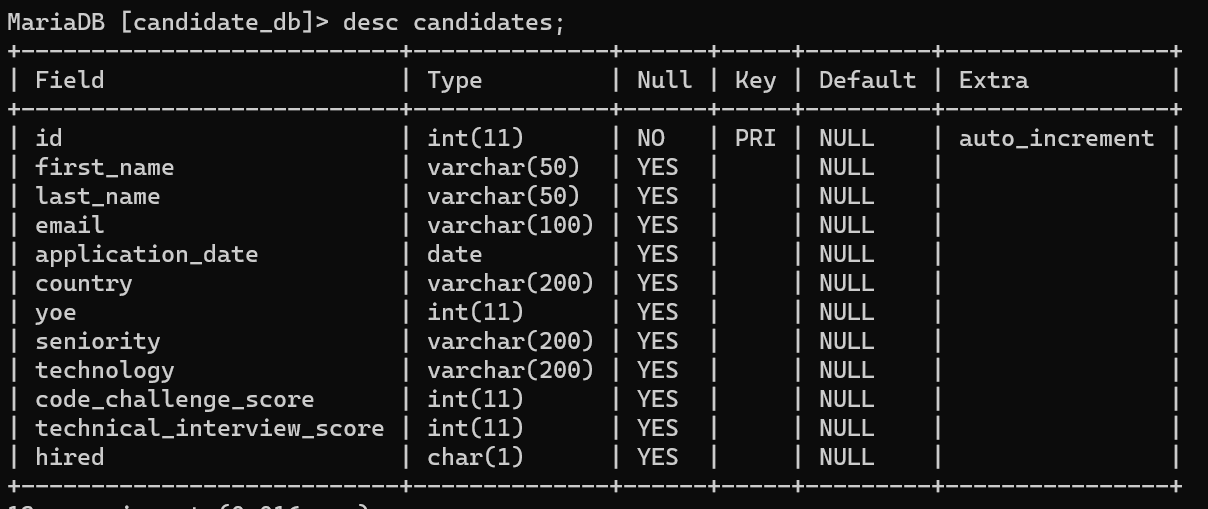

### The Step #3: We will modify and insert the data into the tables

Initially, we will modify the column names in the dataframe to align with the corresponding column names in the table. Following that, we will proceed to establish the "hired" column.
The next step is to load the csv file with the information, including the code to fill the column "hired" that indicates whether a candidate was hired ("y") or not ("n").

In [118]:
Session = sessionmaker(bind=engine)
session = Session()



for _, row in data.iterrows():
    candidate = Candidate(
        first_name=row['first_name'],
        last_name=row['last_name'],
        email=row['email'],
        application_date=row['app_date'],
        country=row['country'],
        yoe=row['yoe'],
        seniority=row['seniority'],
        technology=row['technology'],
        code_challenge_score=row['cc_score'],
        technical_interview_score=row['ti_score']
    )
    
    # Calculate "hired" column

    if row['cc_score'] >= 7 and row['ti_score'] >= 7:
        candidate.hired = 1
    else:
        candidate.hired = 0
    
    session.add(candidate)


session.commit()
session.close()

By leveraging pandas to insert the information from the CSV file, we can seamlessly upload the data to the database:

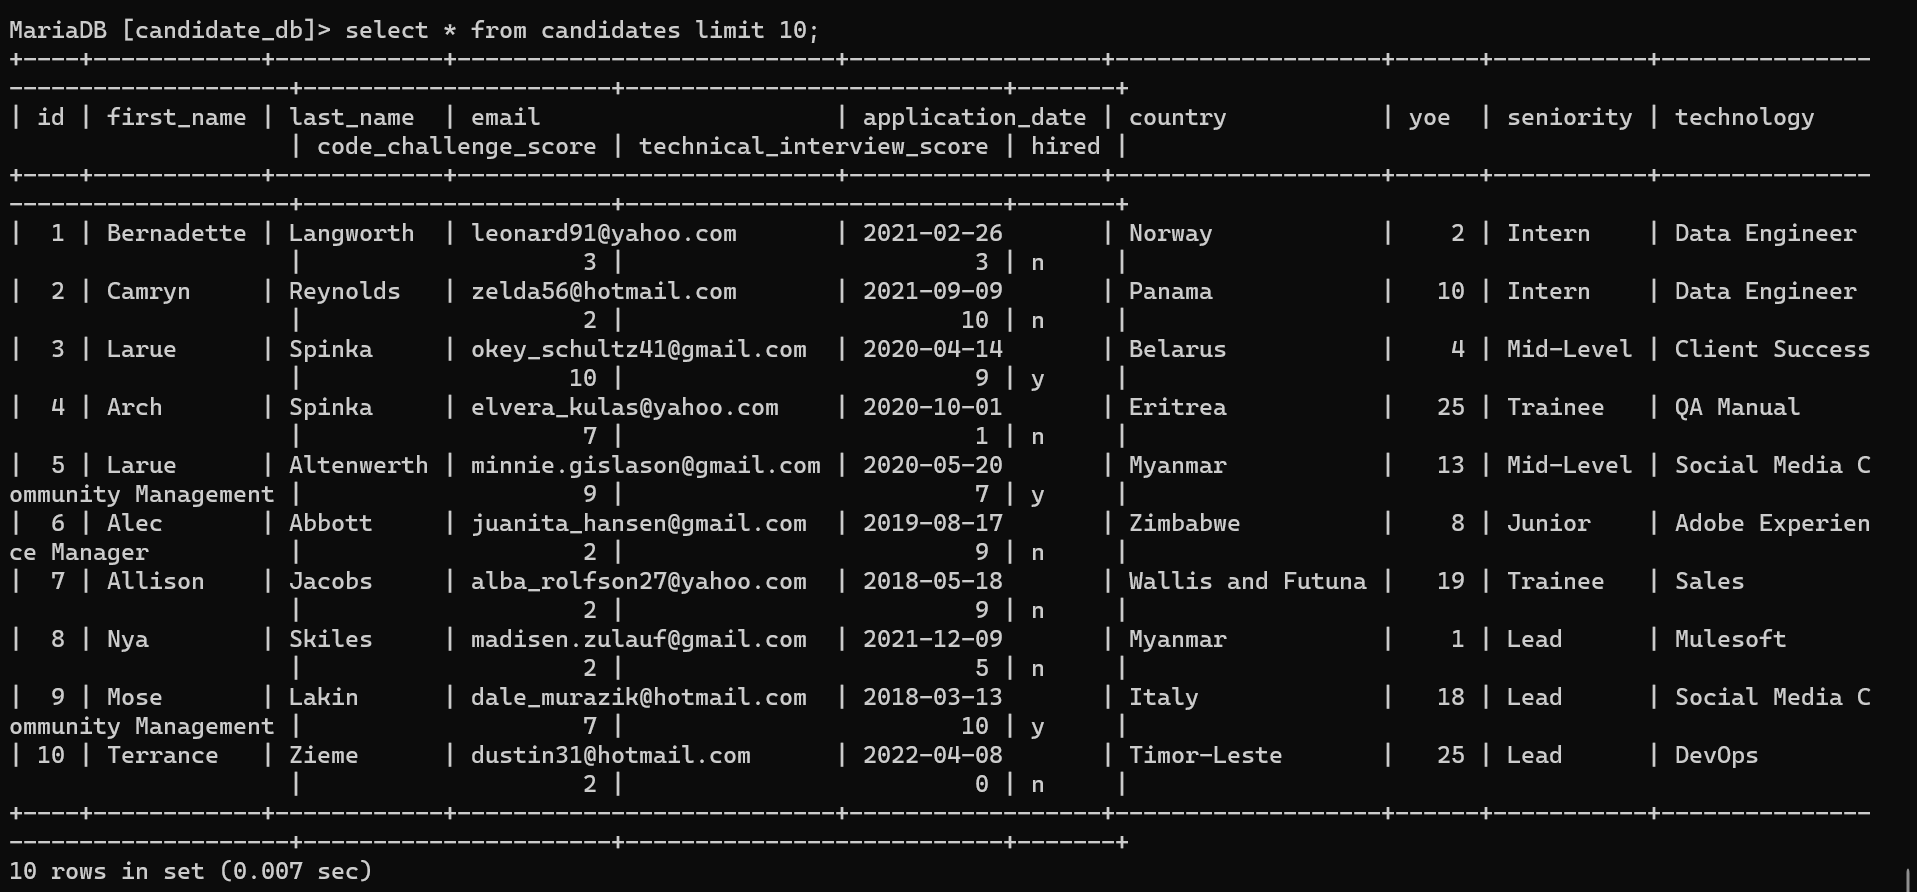

                                 Technology  Count
0                  Adobe Experience Manager    564
1   Business Analytics / Project Management    510
2                     Business Intelligence    508
3                            Client Success    542
4                             Data Engineer    510
5                   Database Administration    564
6                                    Design    498
7                     Development - Backend    510
8                 Development - CMS Backend    568
9                Development - CMS Frontend    502
10                   Development - Frontend    532
11                  Development - FullStack    508
12                                   DevOps    990
13                         Game Development   1038
14                                 Mulesoft    520
15                            QA Automation    486
16                                QA Manual    518
17                                    Sales    478
18                             

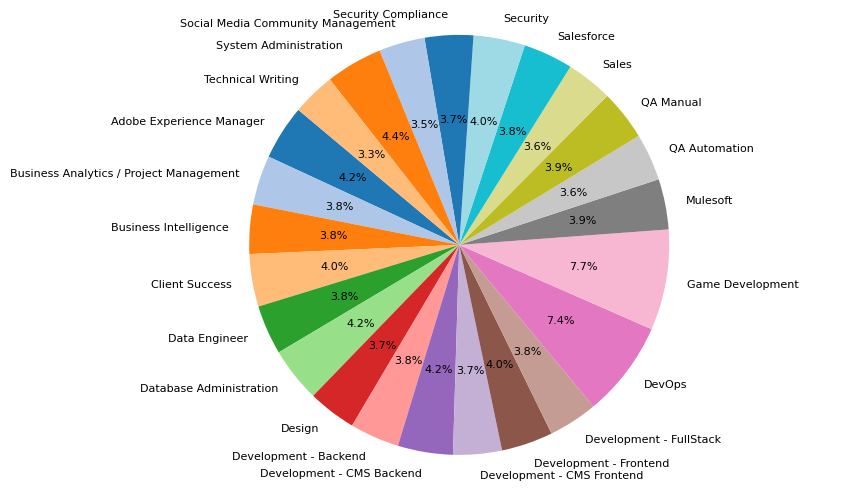

In [121]:
from sqlalchemy import func, extract
import matplotlib.pyplot as plt


Session = sessionmaker(bind=engine)
session = Session()


query = session.query(Candidate.technology, func.count(Candidate.id)).\
        filter(Candidate.hired == "y").\
        group_by(Candidate.technology).\
        all()

session.close()


df = pd.DataFrame(query, columns=['Technology', 'Count'])

print(df)

# Visualization:

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(df['Count'], labels=df['Technology'], autopct='%1.1f%%', textprops={'fontsize': 8}, colors=colors, startangle=140)
plt.axis('equal')  
plt.show()

   year  hires
0  2018   2818
1  2019   3048
2  2020   2970
3  2021   2970
4  2022   1590


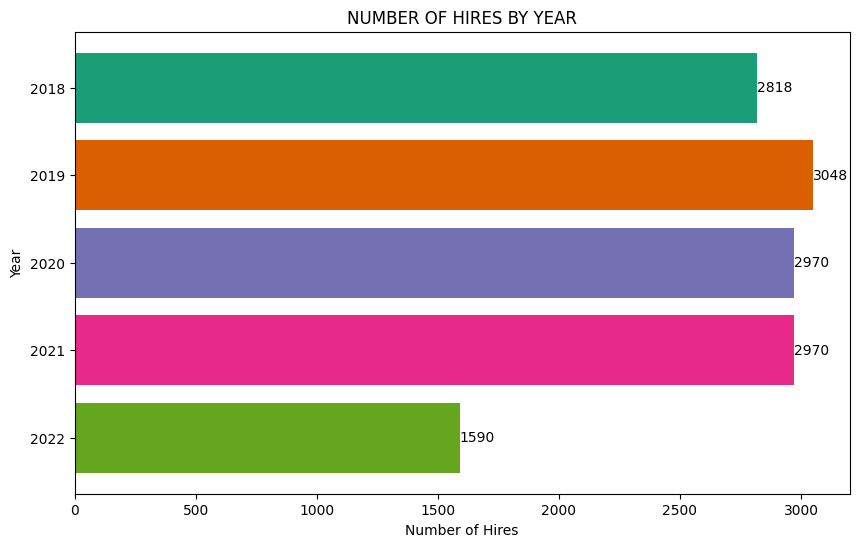

In [124]:
Session = sessionmaker(bind=engine)
session = Session()


query2 = session.query(extract('year', Candidate.application_date).label('year'), func.count(Candidate.id).label('hires')).\
        filter(Candidate.hired == 'y').\
        group_by('year').\
        order_by('year').\
        all()


session.close()


df = pd.DataFrame(query2)

print(df)

colors1 = plt.cm.Dark2.colors


# Visualization:


plt.figure(figsize=(10, 6))
bars = plt.barh(df['year'], df['hires'], color=colors1)
plt.xlabel('Number of Hires')
plt.ylabel('Year')
plt.title('NUMBER OF HIRES BY YEAR')
plt.gca().invert_yaxis()  

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', 
             va='center', ha='left', fontsize=10)

plt.show()

   seniority  hires
0  Architect   1942
1     Intern   1970
2     Junior   1954
3       Lead   1858
4  Mid-Level   1848
5     Senior   1878
6    Trainee   1946


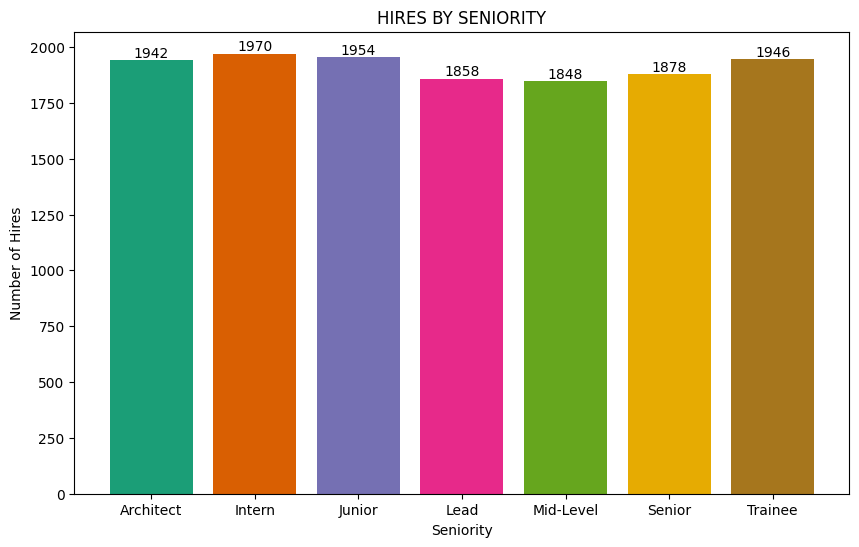

In [125]:
Session = sessionmaker(bind=engine)
session = Session()


query3 = session.query(Candidate.seniority, func.count(Candidate.id).label('hires')).\
        filter(Candidate.hired == 'y').\
        group_by(Candidate.seniority).\
        all()


session.close()


df = pd.DataFrame(query3)

print(df)

# Visualization:

plt.figure(figsize=(10, 6))
bars = plt.bar(df['seniority'], df['hires'], color= colors1)
plt.xlabel('Seniority')
plt.ylabel('Number of Hires')
plt.title('HIRES BY SENIORITY')


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{int(bar.get_height())}', 
             va='bottom', ha='center', fontsize=10)


plt.show()

    year                   country  hires
0   2018                    Brazil     18
1   2018                  Colombia     14
2   2018                   Ecuador      2
3   2018  United States of America     10
4   2019                    Brazil     14
5   2019                  Colombia     16
6   2019                   Ecuador      6
7   2019  United States of America      6
8   2020                    Brazil     12
9   2020                  Colombia     16
10  2020                   Ecuador     16
11  2020  United States of America      8
12  2021                    Brazil     14
13  2021                  Colombia      2
14  2021                   Ecuador     10
15  2021  United States of America     16
16  2022                    Brazil      8
17  2022                  Colombia      2
18  2022                   Ecuador      6
19  2022  United States of America     10


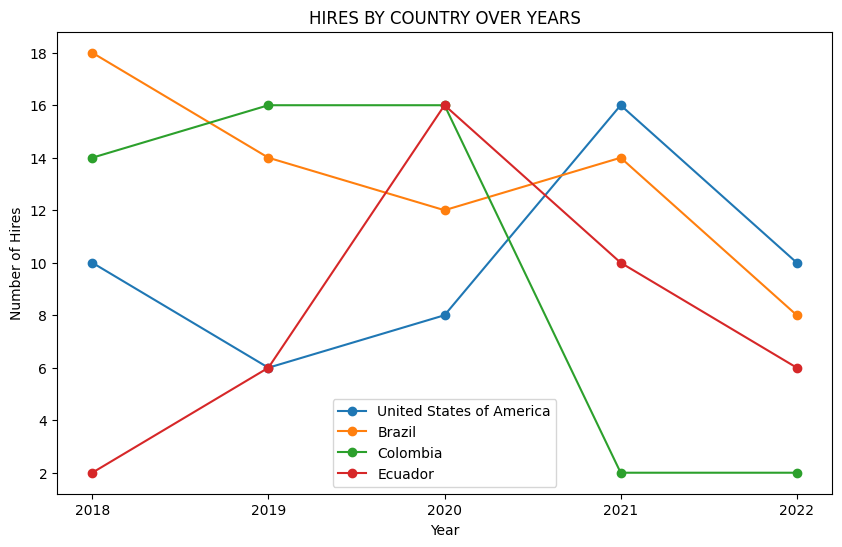

In [126]:
Session = sessionmaker(bind=engine)
session = Session()

# Define the list of countries
countries = ['United States of America', 'Brazil', 'Colombia', 'Ecuador']

# Execute the query using SQLAlchemy
query4 = session.query(extract('year', Candidate.application_date).label('year'),
        Candidate.country,
        func.count(Candidate.id).label('hires')).\
        filter(Candidate.hired == 'y').\
        filter(Candidate.country.in_(countries)).\
        group_by('year', 'country').\
        order_by('year').\
        all()

session.close()


df = pd.DataFrame(query4)

print(df)

#Visualization:

plt.figure(figsize=(10, 6))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['hires'], marker='o', label=country)

plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.title('HIRES BY COUNTRY OVER YEARS')
plt.legend()
plt.xticks(df['year'].unique()) 

plt.show()